# CMPE462 Final Project

## 2015300000 - 2015300210

# Who hurts their liver the most: A Machine Learning Approach

## Dataset : https://www.kaggle.com/miroslavsabo/young-people-survey

### Survey Data of Slovakian participants aged between 15-30

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
young = pd.read_csv("responses.csv")
raw = pd.read_csv("responses.csv")

## Exploratory Data Analysis

In [3]:
pd.set_option('display.max_columns',200)
young.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

As seen below, most of the people surveyed, identified themselves as social drinkers.

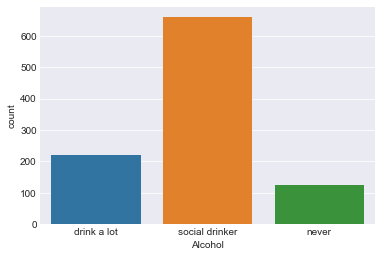

In [4]:
sns.set_style("darkgrid")
plt.rc("font",size=10)
sns.countplot(raw["Alcohol"])

## We wanted to predict people that have tendencies towards alcoholism, so we classified the labels as "drink a lot":1, "rest":0.

In [5]:
young["Alcohol"].replace(("never","social drinker","drink a lot"),(0,0,1),inplace=True)

In [6]:
#Some of the other variables were categorical with strings, replaced them with integers so we can use them in the model
young.Gender.replace(("male","female"),(0,1),inplace=True)
young["Village - town"].replace(("village","city"),(0,1),inplace=True)
young["House - block of flats"].replace(("house/bungalow","block of flats"),(0,1),inplace=True)
young["Education"].replace(("primary school","secondary school","college/bachelor degree","masters degree","doctorate degree",
                            "currently a primary school pupil"),(1,2,3,4,5,6),inplace=True)
young["Smoking"].replace(("never smoked","tried smoking","former smoker","current smoker"),(1,2,3,4),inplace=True)

### Do people who drink a lot, think they're living an unhealthy life?

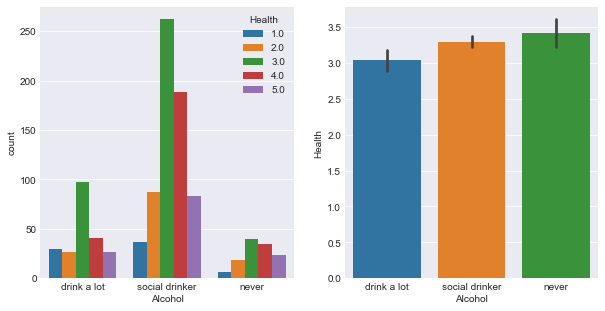

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="Alcohol",data=raw,hue="Health")
plt.subplot(1,2,2)
sns.barplot(x="Alcohol",y="Health",data=raw)

People who drink less tends to view themselves living a more healthy lifestyle.

### Do people drink to forget?

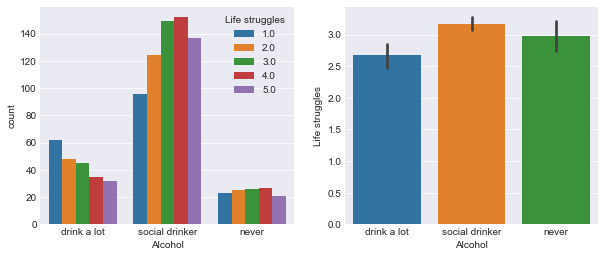

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x="Alcohol",data=raw,hue="Life struggles")
plt.subplot(1,2,2)
sns.barplot(x="Alcohol",y="Life struggles",data=raw)

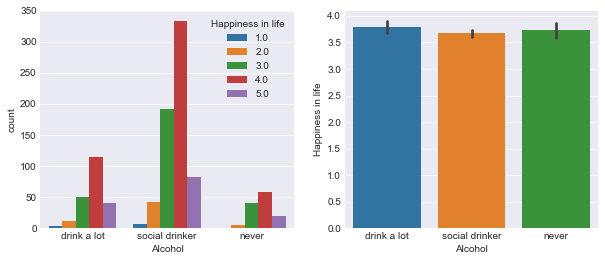

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x="Alcohol",data=raw,hue="Happiness in life")
plt.subplot(1,2,2)
sns.barplot(x="Alcohol",y="Happiness in life",data=raw)

Plots shown above go against the popular belief, on average people who drink a lot suffer less life struggles and are happier in life. However the difference is very small so to comment on it might not be appropriate.

### Next, we looked at correlations between Alcohol consumption and other variables.

In [10]:
corrs = young.corr()

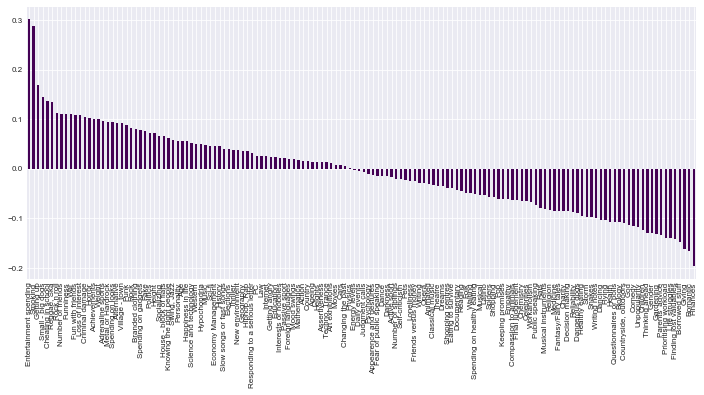

In [11]:
plt.figure(figsize=(12,5))
plt.rc("font",size=8)
corrs.drop("Alcohol",axis=0)["Alcohol"].sort_values(ascending=False).plot(kind="bar",cmap="viridis",)

In [12]:
pos_cor = corrs.drop("Alcohol",axis=0)["Alcohol"].sort_values(ascending=False).head(10)

In [13]:
neg_cor = corrs.drop("Alcohol",axis=0)["Alcohol"].sort_values(ascending=True).head(10)

In [14]:
top_corr= []
for i in range(10):
    top_corr.append(pos_cor.index[i])
    top_corr.append(neg_cor.index[i])

In [15]:
top_corr.append("Alcohol")
good_corr = young[top_corr]
good_corr = good_corr.corr()

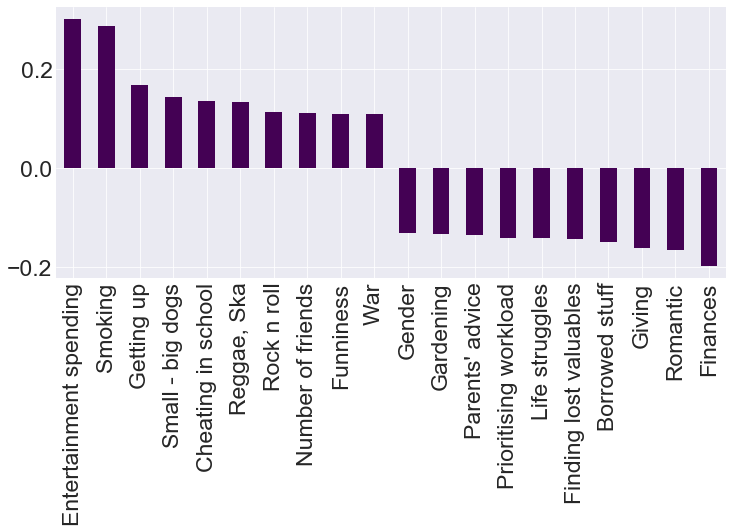

In [16]:
plt.figure(figsize=(12,5))
plt.rc("font",size=23)
good_corr.drop("Alcohol",axis=0)["Alcohol"].sort_values(ascending=False).plot(kind="bar",cmap="viridis",)

Below, we looked at Alcohol's relationship with most and least correlated variables.

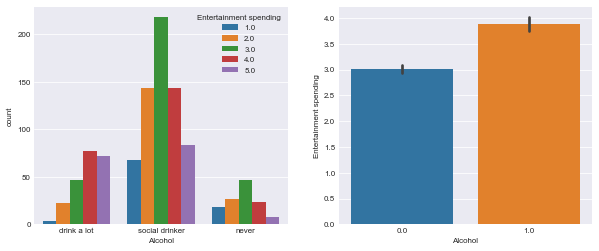

In [19]:
plt.figure(figsize=(10,4))
plt.rc("font",size=8)
plt.subplot(1,2,1)
sns.countplot(x="Alcohol",data=raw,hue="Entertainment spending")
plt.subplot(1,2,2)
sns.barplot(x="Alcohol",y="Entertainment spending",data=young)

People who drink a lot, as expected, spend more on entertainment on average.

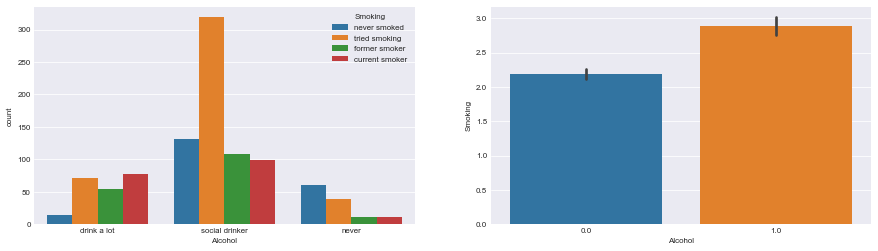

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x="Alcohol",data=raw,hue="Smoking")
plt.subplot(1,2,2)
sns.barplot(x="Alcohol",y="Smoking",data=young)

Drinkers tend to be regular smokers more on average. This is probably due to increased smoking while consuming alcohol, leading to smoking addiction.

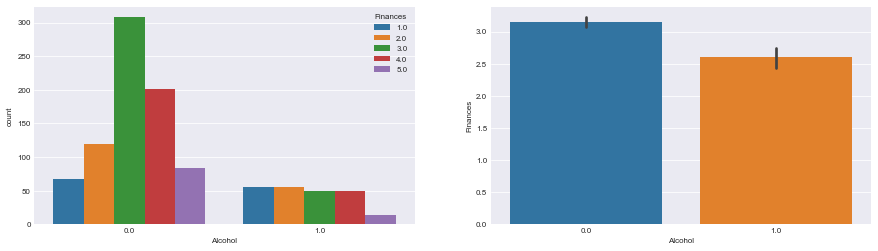

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x="Alcohol",data=young,hue="Finances")
plt.subplot(1,2,2)
sns.barplot(x="Alcohol",y="Finances",data=young)

Drinkers tend to be more lavish with their funds on average.

### Below, we look at correlations between the variables that correlate with Alcohol variable the most, to see if there are any multicollinearity problems that we should keep in mind during our feature selection for the models.

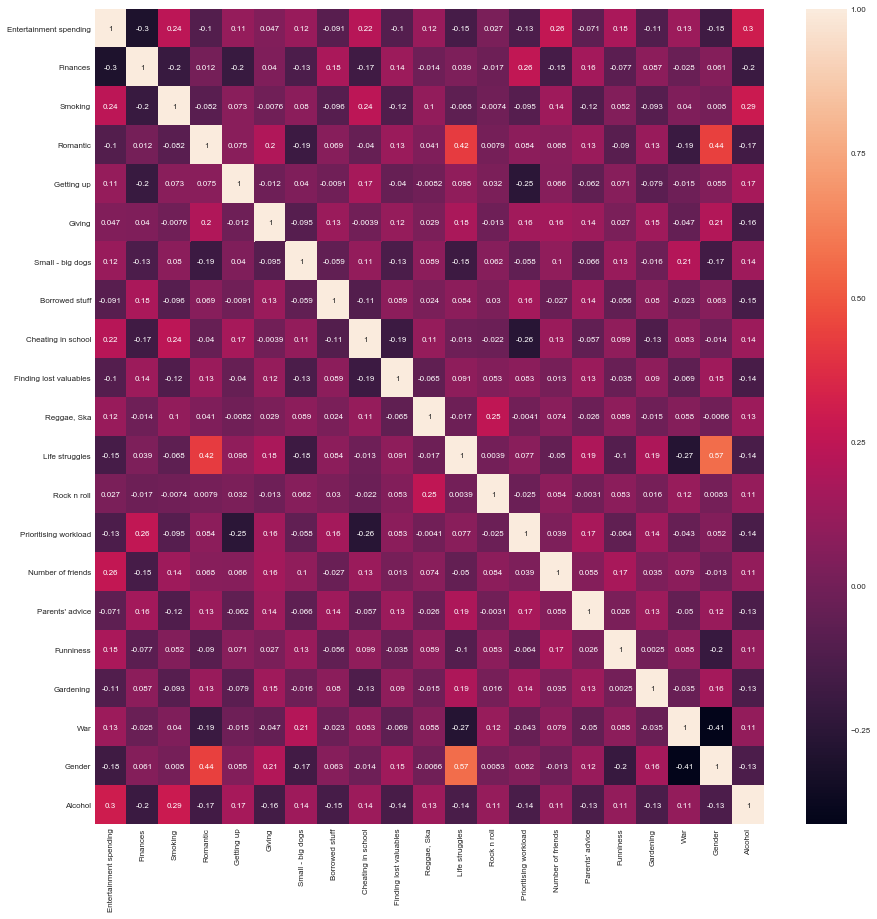

In [22]:
plt.rc("font",size=8)
plt.figure(figsize=(15,15))
sns.heatmap(good_corr,annot=True)

There doesn't seem to be any variable that correlate more than 0.7, so we can continue to our feature selection.

# Models & Feature Selection

### In all of the models below, we wrote a loop to find the optimal set of features from the top_corr list, which consisted of 20 most correlated variables with Alcohol variable. To find the optimal set of features, we look at the accuracy score of every model with 5-fold cross validation.

## 1 - Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

### We use grid search to find the optimal regularization parameter for our model below.

In [27]:
features = []
param_grid = {'C':[.01,.03,.1,.3,1,3,10]}
for i in range(len(top_corr)-1):
    features = top_corr[0:i+1]
    young.dropna(subset=["Alcohol"],inplace=True)
    young.dropna(subset=features,inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(young[features],young["Alcohol"], test_size=0.3, random_state=101)
    
    kf = KFold(len(X_train), n_folds=5)
    
    logreg=LogisticRegression()
    logreg.fit(X_train,y_train)
    
    gs_logreg = GridSearchCV(logreg, param_grid=param_grid, cv=kf)

    gs_logreg.fit(X_train, y_train)
    
    
    print("-----------------------------------------------------------------------------------")
    print("Optimal Regularization Parameter C:{}".format(gs_logreg.best_params_["C"]))
    logreg=LogisticRegression(C=gs_logreg.best_params_["C"])
    logreg.fit(X_train,y_train)
    print(features)
    print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kf))))
    print('Accuracy score on test set is: {:.3f}'.format(logreg.score(X_test, y_test)))

-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:0.01
['Entertainment spending']
Average accuracy score on cv (KFold) set: 0.773
Accuracy score on test set is: 0.794
-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:0.1
['Entertainment spending', 'Finances']
Average accuracy score on cv (KFold) set: 0.791
Accuracy score on test set is: 0.757
-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:0.1
['Entertainment spending', 'Finances', 'Smoking']
Average accuracy score on cv (KFold) set: 0.793
Accuracy score on test set is: 0.783
-----------------------------------------------------------------------------------
Optimal Regularization Parameter C:0.3
['Entertainment spending', 'Finances', 'Smoking', 'Romantic']
Average accuracy score on cv (KFold) set: 0.802
Accuracy score on test set

In [28]:
best_feat = ['Entertainment spending', 'Finances', 'Smoking', 'Romantic', 'Getting up', 'Giving', 'Small - big dogs', 'Borrowed stuff', 'Cheating in school', 'Finding lost valuables', 'Reggae, Ska', 'Life struggles', 'Rock n roll', 'Prioritising workload']
X_train, X_test, y_train, y_test = train_test_split(young[best_feat],young["Alcohol"], test_size=0.3, random_state=30)

logreg = LogisticRegression(C=10)
logreg.fit(X_train, y_train)

print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(logreg, X_train, y_train, cv=kf))))
print('Accuracy score on test set is: {:.3f}'.format(logreg.score(X_test, y_test)))

Average accuracy score on cv (KFold) set: 0.833
Accuracy score on test set is: 0.792


In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
preds=logreg.predict(X_test)
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

        0.0       0.80      0.95      0.87       203
        1.0       0.74      0.37      0.49        76

avg / total       0.78      0.79      0.77       279



Text(0,0.5,'Importance')

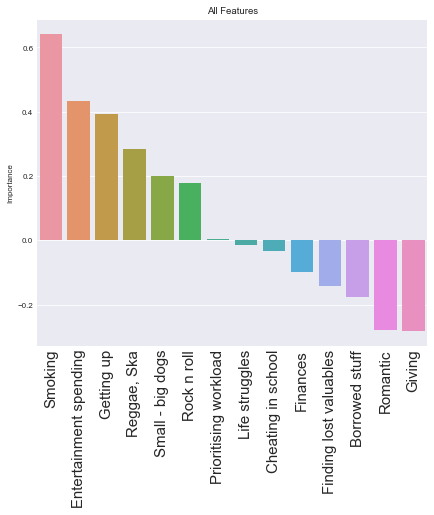

In [31]:
sns.set_style("darkgrid")
coeff_df = pd.DataFrame(data=logreg.coef_[0], index=[X_train.columns], columns=['Feature_Import'])
coeff_df = coeff_df.sort_values(by='Feature_Import', ascending=False)

fig, ax1 = plt.subplots(1,1, figsize=(7,6))
sns.barplot(x=coeff_df.index, y=coeff_df['Feature_Import'], ax=ax1)
ax1.set_title('All Features')
ax1.set_xticklabels(labels=coeff_df.index, size=15, rotation=90)
ax1.set_ylabel('Importance')

## We plot the learning curve for validation and training scores.

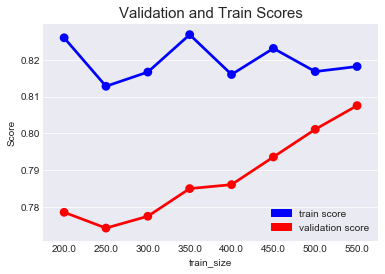

In [48]:
from sklearn.model_selection import learning_curve
import matplotlib.patches as mpatches
plt.rc("font",size=10)
plt.title('Validation and Train Scores',size=15)
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(C=10), young[best_feat],young["Alcohol"], train_sizes=[(i+4)*50 for i in range(8)], cv=5)
train_sizes
for i in range(len(train_sizes)):
    train_scores[i]=train_scores[i].mean()
    valid_scores[i]=valid_scores[i].mean()
train_scores = np.asarray(train_scores[:,1])
valid_scores = np.asarray(valid_scores[:,1])
valid_df = pd.DataFrame([train_scores,valid_scores,train_sizes]).transpose()
valid_df.columns = ['train_score','valid_score','train_size']
sns.pointplot(x='train_size',y='train_score',data=valid_df, color="blue")
sns.pointplot(x='train_size',y='valid_score',data=valid_df,color='red')
plt.ylabel('Score')
blue = mpatches.Patch(color='blue', label='train score')
red = mpatches.Patch(color='red', label='validation score')
plt.legend(handles=[blue,red])

#### Observe that the validation score is increasing as we use more samples.

## 2- Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
features = []
for i in range(len(top_corr)-1):
    features = top_corr[0:i+1]
    young.dropna(subset=["Alcohol"],inplace=True)
    young.dropna(subset=features,inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(young[features],young["Alcohol"], test_size=0.3, random_state=101)
    kf = KFold(len(X_train), n_folds=5)
    print("-----------------------------------------------------------------------------------")
    print("")
    dtree=DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    print(features)
    print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(dtree, X_train, y_train, cv=kf))))
    print('Accuracy score on test set is: {:.3f}'.format(dtree.score(X_test, y_test)))

-----------------------------------------------------------------------------------

['Entertainment spending']
Average accuracy score on cv (KFold) set: 0.770
Accuracy score on test set is: 0.753
-----------------------------------------------------------------------------------

['Entertainment spending', 'Finances']
Average accuracy score on cv (KFold) set: 0.750
Accuracy score on test set is: 0.746
-----------------------------------------------------------------------------------

['Entertainment spending', 'Finances', 'Smoking']
Average accuracy score on cv (KFold) set: 0.802
Accuracy score on test set is: 0.753
-----------------------------------------------------------------------------------

['Entertainment spending', 'Finances', 'Smoking', 'Romantic']
Average accuracy score on cv (KFold) set: 0.794
Accuracy score on test set is: 0.735
-----------------------------------------------------------------------------------

['Entertainment spending', 'Finances', 'Smoking', 'Romant

In [37]:
best_feat = ['Entertainment spending', 'Finances', 'Smoking']
X_train, X_test, y_train, y_test = train_test_split(young[best_feat],young["Alcohol"], test_size=0.3, random_state=101)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.79      0.91      0.85       210
        1.0       0.50      0.28      0.36        69

avg / total       0.72      0.75      0.73       279



In [38]:
print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(dtree, X_train, y_train, cv=kf))))
print('Accuracy score on test set is: {:.3f}'.format(dtree.score(X_test, y_test)))

Average accuracy score on cv (KFold) set: 0.799
Accuracy score on test set is: 0.753


#### Visualizing the splits for the decision tree.

In [ ]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
class_names = ['alc','nonalc']
feature_names = ["Smoking","Prioritising workload"]
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

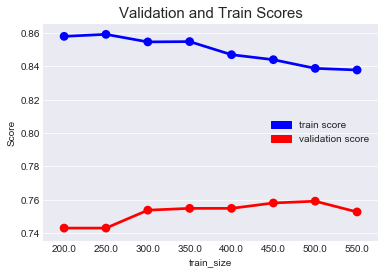

In [39]:

plt.rc("font",size=10)
plt.title('Validation and Train Scores',size=15)
train_sizes, train_scores, valid_scores = learning_curve(DecisionTreeClassifier(), young[best_feat],young["Alcohol"], train_sizes=[(i+4)*50 for i in range(8)], cv=5)
train_sizes
for i in range(len(train_sizes)):
    train_scores[i]=train_scores[i].mean()
    valid_scores[i]=valid_scores[i].mean()
train_scores = np.asarray(train_scores[:,1])
valid_scores = np.asarray(valid_scores[:,1])
valid_df = pd.DataFrame([train_scores,valid_scores,train_sizes]).transpose()
valid_df.columns = ['train_score','valid_score','train_size']
sns.pointplot(x='train_size',y='train_score',data=valid_df, color="blue")
sns.pointplot(x='train_size',y='valid_score',data=valid_df,color='red')
plt.ylabel('Score')
blue = mpatches.Patch(color='blue', label='train score')
red = mpatches.Patch(color='red', label='validation score')
plt.legend(handles=[blue,red])

## 3- K Nearest Neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier

### To find the optimal K parameter, we plot K's with respect to the error rate

In [41]:
def my_min(sequence):
    """return the minimum element of sequence"""
    low = sequence[0] # need to start with some value
    for i in sequence:
        if i < low:
            low = i
    return low

features = []
for i in range(len(top_corr)-1):
    features = top_corr[0:i+1]
    young.dropna(subset=["Alcohol"],inplace=True)
    young.dropna(subset=features,inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(young[features],young["Alcohol"], test_size=0.3, random_state=20)
    kf = KFold(len(X_train), n_folds=5)
    
    error_rate = []
    #Find the optimal K by finding the errors from 1 to 40 and picking the K with lowest error
    for i in range(1,40):
    
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    ideal_K = error_rate.index(my_min(error_rate))
    
    print("-----------------------------------------------------------------------------------")
    knn=KNeighborsClassifier(n_neighbors=ideal_K)
    knn.fit(X_train,y_train)
    print("Ideal K:{}".format(ideal_K))
    print(features)
    print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(knn, X_train, y_train, cv=kf))))
    print('Accuracy score on test set is: {:.3f}'.format(knn.score(X_test, y_test)))

-----------------------------------------------------------------------------------
Ideal K:3
['Entertainment spending']
Average accuracy score on cv (KFold) set: 0.750
Accuracy score on test set is: 0.717
-----------------------------------------------------------------------------------
Ideal K:3
['Entertainment spending', 'Finances']
Average accuracy score on cv (KFold) set: 0.725
Accuracy score on test set is: 0.746
-----------------------------------------------------------------------------------
Ideal K:24
['Entertainment spending', 'Finances', 'Smoking']
Average accuracy score on cv (KFold) set: 0.783
Accuracy score on test set is: 0.774
-----------------------------------------------------------------------------------
Ideal K:30
['Entertainment spending', 'Finances', 'Smoking', 'Romantic']
Average accuracy score on cv (KFold) set: 0.788
Accuracy score on test set is: 0.789
-----------------------------------------------------------------------------------
Ideal K:6
['Entertai

In [42]:
best_feat = ['Entertainment spending', 'Finances', 'Smoking', 'Romantic', 'Getting up', 'Giving', 'Small - big dogs']
X_train, X_test, y_train, y_test = train_test_split(young[best_feat],young["Alcohol"], test_size=0.3, random_state=20)
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0,0.5,'Error Rate')

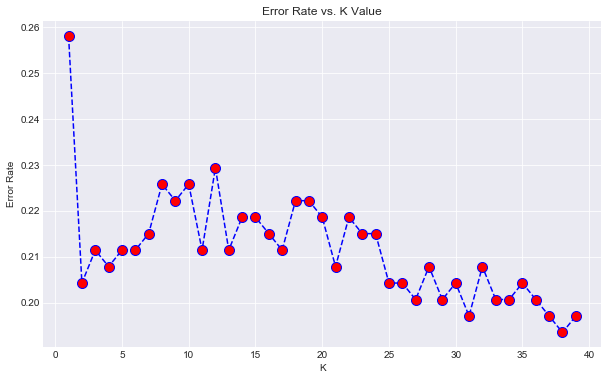

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Optimal K turns out to be 37 for the dataset with best Accuracy score on K-fold cross validation.

In [44]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [45]:
preds = knn.predict(X_test)
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

        0.0       0.81      0.95      0.87       215
        1.0       0.60      0.23      0.34        64

avg / total       0.76      0.79      0.75       279



In [46]:
print('Average accuracy score on cv (KFold) set: {:.3f}'.format(np.mean(cross_val_score(knn, X_train, y_train, cv=kf))))
print('Accuracy score on test set is: {:.3f}'.format(knn.score(X_test, y_test)))

Average accuracy score on cv (KFold) set: 0.808
Accuracy score on test set is: 0.789


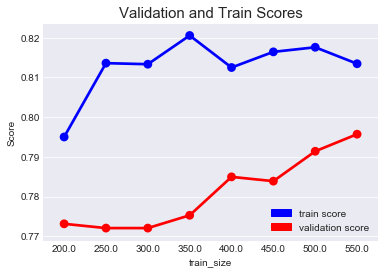

In [47]:
plt.rc("font",size=10)
plt.title('Validation and Train Scores',size=15)
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=37), young[best_feat],young["Alcohol"], train_sizes=[(i+4)*50 for i in range(8)], cv=5)
train_sizes
for i in range(len(train_sizes)):
    train_scores[i]=train_scores[i].mean()
    valid_scores[i]=valid_scores[i].mean()
train_scores = np.asarray(train_scores[:,1])
valid_scores = np.asarray(valid_scores[:,1])
valid_df = pd.DataFrame([train_scores,valid_scores,train_sizes]).transpose()
valid_df.columns = ['train_score','valid_score','train_size']
sns.pointplot(x='train_size',y='train_score',data=valid_df, color="blue")
sns.pointplot(x='train_size',y='valid_score',data=valid_df,color='red')
plt.ylabel('Score')
blue = mpatches.Patch(color='blue', label='train score')
red = mpatches.Patch(color='red', label='validation score')
plt.legend(handles=[blue,red])